In [3]:
from sklearn import tree
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    #create 100 * 100 coordinate array  
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)   
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    #predicted points for each of the points in the coord array
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    #plot contour fillings. each class gets a different color.
    #places where class changes, a line will be drawn
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

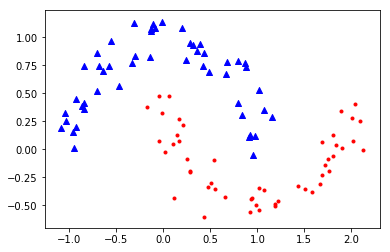

In [4]:
X,y = make_moons(noise=0.10)
classes = np.unique(y)
x0_0 = X[y == 0][:,0]; x1_0 = X[y == 0][:,1];
x0_1 = X[y == 1][:,0]; x1_1 = X[y == 1][:,1]

plt.scatter(x0_0, x1_0, marker='^', c='b')
plt.scatter(x0_1, x1_1, marker='.', c='r')
plt.show()


In [5]:
tree_clf = tree.DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
tree_clf.score(X, y)

1.0

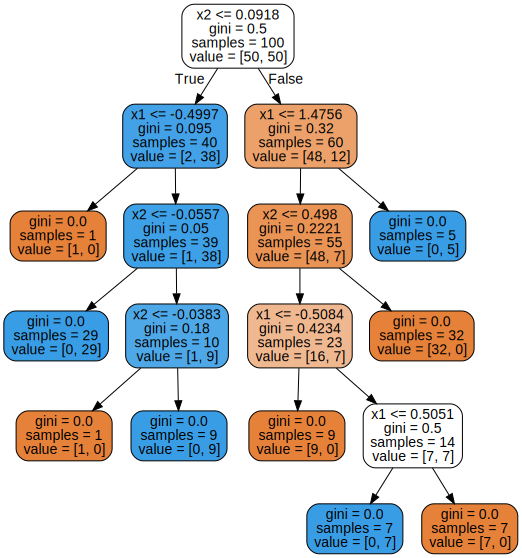

In [7]:
import graphviz, os
#os.environ['path'] += ('C:\\Program Files (x86)\\Graphviz2.38\\bin')
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                         feature_names=['x1', 'x2'],    
                         filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph

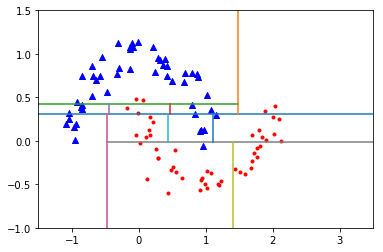

In [8]:
plt.scatter(x0_0, x1_0, marker='^', c='b')
plt.scatter(x0_1, x1_1, marker='.', c='r')

plt.plot([-2, 3.5],[0.3033, 0.3033])
plt.plot([1.4793, 1.4793],[0.3033, 1.7])
plt.plot([-2, 1.4793],[0.4226, 0.4226])
plt.plot([0.4624, 0.4624],[0.3033, 0.4226])
plt.plot([-0.4428, -0.4428],[0.3033, 0.4226])
plt.plot([-0.4821, -0.4821],[-1.7, 0.3033])
plt.plot([-0.4821, -0.4821],[-1.7, 0.3033])
plt.plot([-0.4821, 3.5],[-0.01, -0.01])
plt.plot([1.4076, 1.4076],[ -1.7,  -0.01])
plt.plot([0.4286, 0.4286],[ -0.01,  0.303])
plt.plot([1.1, 1.1],[-0.01,  0.303])
0.4286

'''
plt.plot([1.5237, 1.5237],[0.1225, 1.7])
plt.plot([-0.5041, -0.5041],[-1.2, 0.1225])
plt.plot([-2, 1.5237],[0.5816, 0.5816])
plt.plot([-0.5041, 3.5],[-0.2, -0.2])
'''
-0.0778

plt.axis([-1.5, 3.5, -1, 1.5 ])
plt.show()

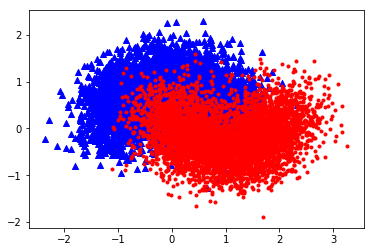

In [10]:
#fine tuning a decision tree

X, y = make_moons(n_samples=10000, noise=0.4)
x0_0 = X[y == 0][:,0]; x1_0 = X[y == 0][:,1];
x0_1 = X[y == 1][:,0]; x1_1 = X[y == 1][:,1]

plt.scatter(x0_0, x1_0, marker='^', c='b')
plt.scatter(x0_1, x1_1, marker='.', c='r')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)

print ('Accuracy on train set: ', tree_clf.score(X_train, y_train))
print ('Accuracy on test set: ', accuracy_score(y_test, y_pred))

Accuracy on train set:  1.0
Accuracy on test set:  0.79


In [46]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(tree_clf, 
                          param_grid = [
                              {'max_depth':[3,5,7,9], 'min_samples_leaf':[5,10,15,20]},
                              {'max_depth':[7,9,11,13], 'min_samples_leaf':[3,5,7,9]},
                              {'max_depth':[5,7,9], 'min_samples_leaf':[3,5,7,9,11,13,15,17,19]},
                          ], 
                          verbose=1)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 59 candidates, totalling 177 fits


[Parallel(n_jobs=1)]: Done 177 out of 177 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [5, 10, 15, 20]}, {'max_depth': [7, 9, 11, 13], 'min_samples_leaf': [3, 5, 7, 9]}, {'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7, 9, 11, 13, 15, 17, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

{'max_depth': 7, 'min_samples_leaf': 10}
0.851866666667


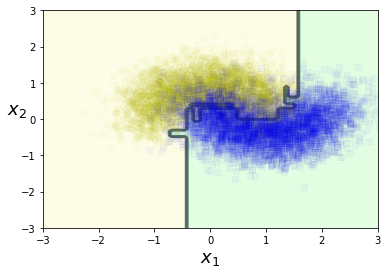

In [44]:
print(grid_search.best_params_)
print(grid_search.best_score_)

plot_decision_boundary(grid_search, X, y, axes=[-3,3,-3,3], alpha=0.03)
plt.show()

In [102]:
#Manually creating a random forest 

from sklearn.model_selection import ShuffleSplit
from scipy import stats

rs = ShuffleSplit(n_splits=1000, test_size=.25, random_state=0)
tree_list = []

#fit
for train_index, test_index in rs.split(X_train):
    tree_clf = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)
    tree_clf.fit(X_train[train_index], y_train[train_index])
    tree_list.append(tree_clf)
    
    #y_pred = tree_clf.predict(X_train[test_index])
    #preds.append(y_pred)
    
    #print (accuracy_score(y_train[test_index], y_pred))
    #print (tree_clf.score(X_train[train_index], y_train[train_index]))

    
#predict
modes = []
counter = 0
for test_instance in X_test:
    preds = []
    if counter % 100 == 0: print (counter)
    for tree_clf in tree_list:
        pred = tree_clf.predict(test_instance.reshape(1,-1))
        preds.append(pred)

    #keep only the mode over the predictions (save mode in a list)
    preds = np.array(preds)
    preds_mode = stats.mode(preds)
    modes.append(np.asscalar(preds_mode[0]))
    counter += 1

#measure accuracy over the list of modes



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [107]:
modes_np = np.array(modes)
print ('Accuracy of manual random forest: ', accuracy_score(y_test, modes_np))

Accuracy of manual random forest:  0.858
